# Analysis of Inuka Africa sample loan data

In [1]:
# load packages 
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# create a working directory
os.chdir("inuka_africa")
os.listdir('.')

['Inuka Sample Data.xlsx']

In [3]:
# using the sample data sent by client
data = pd.ExcelFile('Inuka Sample Data.xlsx')
data.sheet_names

[u'Clients',
 u'Loans',
 u'Loan Schedules',
 u'Loan Payments',
 u'Offices',
 u'Groups',
 u'Loan Products',
 u'Loan Status',
 u'Client Groups']

In [4]:
# assign each sheet to a dataframe
clients = data.parse('Clients')
loans = data.parse('Loans', parse_dates=['Date Disbursed', 'Expected Maturity Date', 'Maturity Date', 'Closed Date'], errors='coerce', )
loans_schedules = data.parse('Loan Schedules')
loans_payments = data.parse('Loan Payments')
offices = data.parse('Offices')
groups = data.parse('Groups')
loan_products = data.parse('Loan Products')
loan_status = data.parse('Loan Status')
client_groups = data.parse('Client Groups')

# EDA of clients data

In [5]:
# sample of clients
clients.head(2)

,Client ID,Client Status,Status ID,Office,Office ID,Group,Group ID
0,1,Active,300,Ngong Rd,2,NaN,NaN
1,2,Active,300,Ngong Rd,2,NaN,NaN


In [6]:
# rename columns
clients.columns = clients.columns.str.replace(' ', '_')
clients.columns

Index([u'Client_ID', u'Client_Status', u'Status_ID', u'Office', u'Office_ID',
       u'Group', u'Group_ID'],
      dtype='object')

In [7]:
#for clients data
# clients = pd.read_csv('inuka_clients.csv')
print('clients data has got {} rows and {} columns.'.format(clients.shape[0], clients.shape[1]))

clients data has got 20256 rows and 7 columns.


In [8]:
#checking null data
clients.isnull().sum()

Client_ID            0
Client_Status        0
Status_ID            0
Office               0
Office_ID            0
Group            17492
Group_ID         17492
dtype: int64

In [9]:
# Account status
clients['Client_Status'].value_counts()

Active        20227
Not Active       29
Name: Client_Status, dtype: int64

In [10]:
# distribution of values for the Office column 
clients['Office'].value_counts()

Embakasi        1527
Kariobangi      1384
Nakuru          1243
Thika           1204
Ngong Rd        1179
Eldoret 2       1131
Eldoret         1050
Kahawa          1028
Kiambu          1002
Rongai          1000
Kitale           988
Naivasha         868
Kericho          772
Limuru           678
Kapsabet         668
Ngorika          632
Mombasa          453
Litein           413
Mtwapa           364
Iten             358
Eldoret 3        357
Kapenguria       346
Ndonyo Njeru     343
Nandi Hills      341
Bomet            317
Ukunda           311
Narok            293
Head Office        6
Name: Office, dtype: int64

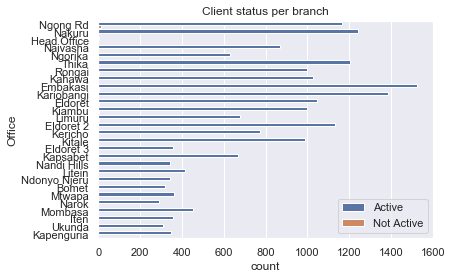

In [11]:
# client status per branch
sns.countplot(y='Office', hue='Client_Status', data=clients)
locs, labels = plt.xticks()
plt.legend(loc='lower right')
plt.title('Client status per branch')
plt.show()

# EDA of loans data

In [12]:
# sample of loans data
loans.head(2)

,Loan ID,Client ID,Product ID,Product,Status ID,Loan Status,Principal,Interest,Repayments,Date Disbursed,...,Closed Date,Principal Repaid,Principal Outstanding,Interest Repaid,Interest Outstanding,Loan Outstanding,Penalties Charged,Penalties Paid,Penalties Waived,Penalties Outstanding
0,1,2,3,Inua Biashara,500,Rejected,0,0.0,4,NaN,...,2015-03-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,3,1,Jenga Biashara,500,Rejected,0,0.0,8,NaN,...,2015-03-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# rename columns to python standards
loans.columns = loans.columns.str.replace(' ', '_')
loans.columns

Index([u'Loan_ID', u'Client_ID', u'Product_ID', u'Product', u'Status_ID',
       u'Loan_Status', u'Principal', u'Interest', u'Repayments',
       u'Date_Disbursed', u'Expected_Maturity_Date', u'Maturity_Date',
       u'Closed_Date', u'Principal_Repaid', u'Principal_Outstanding',
       u'Interest_Repaid', u'Interest_Outstanding', u'Loan_Outstanding',
       u'Penalties_Charged', u'Penalties_Paid', u'Penalties_Waived',
       u'Penalties_Outstanding'],
      dtype='object')

In [14]:
# shape of the data
print('loans data has got {} rows and {} columns.'.format(loans.shape[0], loans.shape[1]))

loans data has got 47342 rows and 22 columns.


In [15]:
#checking null data
loans.isnull().sum()

Loan_ID                       0
Client_ID                     0
Product_ID                    0
Product                       0
Status_ID                     0
Loan_Status                   0
Principal                     0
Interest                      0
Repayments                    0
Date_Disbursed             2409
Expected_Maturity_Date        0
Maturity_Date               391
Closed_Date               17810
Principal_Repaid              0
Principal_Outstanding         0
Interest_Repaid               0
Interest_Outstanding          0
Loan_Outstanding              0
Penalties_Charged             0
Penalties_Paid                0
Penalties_Waived              0
Penalties_Outstanding         0
dtype: int64

In [16]:
# check data types
loans.dtypes

Loan_ID                            int64
Client_ID                          int64
Product_ID                         int64
Product                           object
Status_ID                          int64
Loan_Status                       object
Principal                          int64
Interest                         float64
Repayments                         int64
Date_Disbursed                    object
Expected_Maturity_Date    datetime64[ns]
Maturity_Date                     object
Closed_Date                       object
Principal_Repaid                 float64
Principal_Outstanding            float64
Interest_Repaid                  float64
Interest_Outstanding             float64
Loan_Outstanding                 float64
Penalties_Charged                float64
Penalties_Paid                   float64
Penalties_Waived                 float64
Penalties_Outstanding            float64
dtype: object

In [17]:
# convert dates column to datetime types
loans['Date_Disbursed'] = pd.to_datetime(loans['Date_Disbursed'])
loans['Maturity_Date'] = pd.to_datetime(loans['Maturity_Date'])
loans['Closed_Date'] = pd.to_datetime(loans['Closed_Date'])

In [18]:
loans['Date_Disbursed'].describe().T

count                   44933
unique                    626
top       2017-04-28 00:00:00
freq                      266
first     2015-01-06 00:00:00
last      2017-06-14 00:00:00
Name: Date_Disbursed, dtype: object

## Our data consists of loans issued between 2015-01-06 and  2017-06-14

In [19]:
# repeat borrowers
loans['repeat_borrowing'] = loans.groupby('Client_ID')['Client_ID'].transform('count')
loans.repeat_borrowing.value_counts()

2     11496
3      8283
1      8013
4      5452
5      3275
6      2454
7      2100
8      1456
9      1125
10      850
11      605
13      533
12      468
14      378
17      187
15      165
16      144
20       80
19       57
18       54
24       48
22       44
27       27
25       25
23       23
Name: repeat_borrowing, dtype: int64

In [20]:
# for any given loan, expected maturity > date disbursed
loans['check_dates'] = np.where(loans.Expected_Maturity_Date > loans.Date_Disbursed, 'right', 'wrong' )
loans.check_dates.value_counts()

right    44933
wrong     2409
Name: check_dates, dtype: int64

In [21]:
wrong_dates = loans[loans['check_dates']=='wrong']
wrong_dates[['Date_Disbursed', 'Expected_Maturity_Date']].head(2)

,Date_Disbursed,Expected_Maturity_Date
0,NaT,2015-02-11
1,NaT,2015-03-04


## wrong dates are due to missing values in the disbursement dates.

In [23]:
#distribution of loan products in loans data
loans['Product'].value_counts()

Inua Biashara                    25097
Jenga Biashara                   18136
Dumisha Biashara                  2936
New Ngorika Agri Loan              931
Inua Biashara Post Paid (15%)      163
Ndonyo Njeru Agri Loan              40
Inua Biashara Post Paid (10%)       33
New Ngorika Capacity Loan            6
Name: Product, dtype: int64

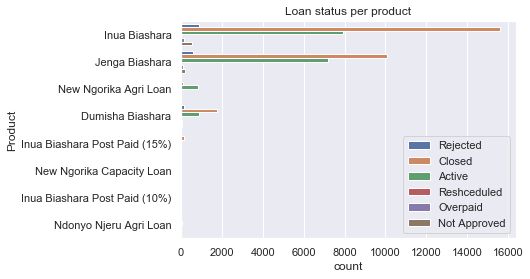

In [24]:
sns.countplot(y='Product', hue='Loan_Status', data=loans)
locs, labels = plt.xticks()
plt.legend(loc='lower right')
plt.title('Loan status per product')
plt.show()

In [25]:
# Loan outstanding amount per frequency of repeat borrowing 
pd.pivot_table(loans, index=['repeat_borrowing'], values=['Loan_Outstanding'], aggfunc=np.sum).sort_values('Loan_Outstanding', ascending=False)

,Loan_Outstanding
repeat_borrowing,
1,78255531.19
2,25077528.69
3,16720040.82
4,8026911.44
6,5457273.86
5,3893622.80
7,3071273.62
8,2164329.53
9,1609873.38


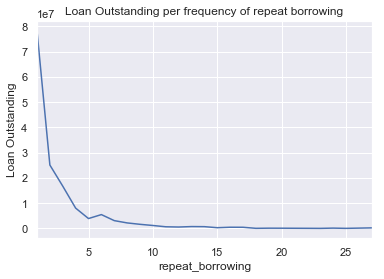

In [26]:
loans.groupby('repeat_borrowing')['Loan_Outstanding'].sum().plot()
plt.ylabel('Loan Outstanding')
plt.title('Loan Outstanding per frequency of repeat borrowing')
plt.show()

## First applicants have the highest outstanding amount.
## Outstanding amounts decrease as frequency of repeat borrowing increase.

In [27]:
# Total outstanding amount per product
pd.pivot_table(loans, index=['Product'], values=['Loan_Outstanding'], aggfunc=np.sum).sort_values('Loan_Outstanding', ascending=False)

,Loan_Outstanding
Product,
New Ngorika Agri Loan,64638400.64
Jenga Biashara,44437546.02
Inua Biashara,17597380.01
Dumisha Biashara,16433900.63
Ndonyo Njeru Agri Loan,4069546.00
New Ngorika Capacity Loan,2508338.23
Inua Biashara Post Paid (10%),0.00
Inua Biashara Post Paid (15%),0.00


In [28]:
# principal and interest repaid per product
pd.pivot_table(loans, index=['Product'], values=['Principal_Repaid', 'Interest_Repaid'], aggfunc=np.sum, margins=True)

,Interest_Repaid,Principal_Repaid
Product,,
Dumisha Biashara,3.522096e+07,1.201668e+08
Inua Biashara,0.000000e+00,2.297991e+08
Inua Biashara Post Paid (10%),3.419999e+04,3.420000e+05
Inua Biashara Post Paid (15%),7.602000e+05,5.068000e+06
Jenga Biashara,7.091171e+07,2.979810e+08
Ndonyo Njeru Agri Loan,2.628927e+05,1.011394e+06
New Ngorika Agri Loan,5.728928e+06,3.328273e+07
New Ngorika Capacity Loan,8.782828e+05,3.367473e+06
All,1.137972e+08,6.910184e+08


In [29]:
pd.pivot_table(loans, index=['Product'], values=['Penalties_Charged'], aggfunc=np.sum, margins=True).sort_values('Penalties_Charged', ascending=True)

,Penalties_Charged
Product,
Ndonyo Njeru Agri Loan,0.000000e+00
New Ngorika Capacity Loan,0.000000e+00
Inua Biashara Post Paid (10%),2.162500e+04
Inua Biashara Post Paid (15%),2.479390e+05
New Ngorika Agri Loan,6.779000e+05
Dumisha Biashara,2.028453e+07
Inua Biashara,6.048014e+07
Jenga Biashara,9.713424e+07
All,1.788464e+08


In [30]:
# Penalties outstanding per product
pd.pivot_table(loans, index=['Product'], values=['Penalties_Outstanding'], aggfunc=np.sum, margins=True).sort_values('Penalties_Outstanding', ascending=True)

,Penalties_Outstanding
Product,
Ndonyo Njeru Agri Loan,0.000000e+00
New Ngorika Capacity Loan,0.000000e+00
Inua Biashara Post Paid (10%),1.277500e+04
Inua Biashara Post Paid (15%),1.072500e+05
New Ngorika Agri Loan,3.802484e+05
Dumisha Biashara,1.285924e+07
Inua Biashara,4.971268e+07
Jenga Biashara,7.565377e+07
All,1.387260e+08


In [31]:
# successful loans
successful_loans=loans[(loans['Loan_Status']!='Rejected') & (loans['Loan_Status']!='Not Approved')]
len(successful_loans)

44933

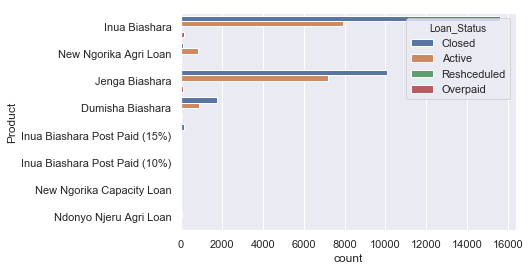

In [32]:
# loan status per product for successful accounts
sns.countplot(y='Product', hue='Loan_Status', data=successful_loans)

In [33]:
# outstanding amounts per successful loans
pd.pivot_table(successful_loans, index=['Product'], values=['Loan_Outstanding'], aggfunc=np.sum).sort_values('Loan_Outstanding', ascending=False)

,Loan_Outstanding
Product,
New Ngorika Agri Loan,64638400.64
Jenga Biashara,44437546.02
Inua Biashara,17597380.01
Dumisha Biashara,16433900.63
Ndonyo Njeru Agri Loan,4069546.00
New Ngorika Capacity Loan,2508338.23
Inua Biashara Post Paid (10%),0.00
Inua Biashara Post Paid (15%),0.00


In [34]:
# outstanding penalties per successful loans
pd.pivot_table(loans, index=['Product'], values=['Penalties_Outstanding'], aggfunc=np.sum).sort_values('Penalties_Outstanding', ascending=False)

,Penalties_Outstanding
Product,
Jenga Biashara,75653774.64
Inua Biashara,49712680.00
Dumisha Biashara,12859236.26
New Ngorika Agri Loan,380248.37
Inua Biashara Post Paid (15%),107250.00
Inua Biashara Post Paid (10%),12775.00
Ndonyo Njeru Agri Loan,0.00
New Ngorika Capacity Loan,0.00


In [35]:
# on time payments: accounts with penalty charged equal to zero
otp = successful_loans[successful_loans['Penalties_Charged']==0]
len(otp)

15109

In [36]:
otp.head(3)

,Loan_ID,Client_ID,Product_ID,Product,Status_ID,Loan_Status,Principal,Interest,Repayments,Date_Disbursed,...,Principal_Outstanding,Interest_Repaid,Interest_Outstanding,Loan_Outstanding,Penalties_Charged,Penalties_Paid,Penalties_Waived,Penalties_Outstanding,repeat_borrowing,check_dates
5,6,10,3,Inua Biashara,600,Closed,15000,0.0,4,2015-01-16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,right
6,7,11,3,Inua Biashara,600,Closed,20000,0.0,4,2015-01-16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,right
9,10,14,3,Inua Biashara,600,Closed,15000,0.0,4,2015-01-20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,right


In [37]:
otp['Product'].value_counts()

Inua Biashara                    8468
Jenga Biashara                   4972
New Ngorika Agri Loan             868
Dumisha Biashara                  725
Ndonyo Njeru Agri Loan             40
Inua Biashara Post Paid (15%)      27
Inua Biashara Post Paid (10%)       5
New Ngorika Capacity Loan           4
Name: Product, dtype: int64

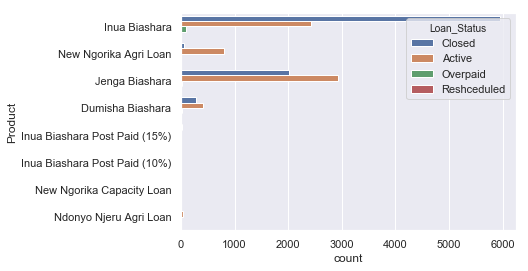

In [38]:
# loan status pe rproduct for otp accounts
sns.countplot(y='Product', hue='Loan_Status', data=otp)

In [39]:
#unsuccessful loans
unsuccessful_loans=loans[(loans['Loan_Status']=='Rejected') | (loans['Loan_Status']=='Not Approved')]
len(unsuccessful_loans)

2409

In [40]:
# sample data for unsuccessful loans
unsuccessful_loans.head(2)

,Loan_ID,Client_ID,Product_ID,Product,Status_ID,Loan_Status,Principal,Interest,Repayments,Date_Disbursed,...,Principal_Outstanding,Interest_Repaid,Interest_Outstanding,Loan_Outstanding,Penalties_Charged,Penalties_Paid,Penalties_Waived,Penalties_Outstanding,repeat_borrowing,check_dates
0,1,2,3,Inua Biashara,500,Rejected,0,0.0,4,NaT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,wrong
1,2,3,1,Jenga Biashara,500,Rejected,0,0.0,8,NaT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,wrong


In [41]:
# summary statistics of unsuccessful loans
unsuccessful_loans.drop(['Loan_ID','Client_ID', 'Product_ID', 'Status_ID'], 1).describe().T

,count,mean,std,min,25%,50%,75%,max
Principal,2409.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Interest,2409.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Repayments,2409.0,6.001660,2.865767,4.0,4.0,4.0,8.0,36.0
Principal_Repaid,2409.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Principal_Outstanding,2409.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Interest_Repaid,2409.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Interest_Outstanding,2409.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Loan_Outstanding,2409.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Penalties_Charged,2409.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Penalties_Paid,2409.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [42]:
unsuccessful_loans.isnull().sum()

Loan_ID                      0
Client_ID                    0
Product_ID                   0
Product                      0
Status_ID                    0
Loan_Status                  0
Principal                    0
Interest                     0
Repayments                   0
Date_Disbursed            2409
Expected_Maturity_Date       0
Maturity_Date                0
Closed_Date                734
Principal_Repaid             0
Principal_Outstanding        0
Interest_Repaid              0
Interest_Outstanding         0
Loan_Outstanding             0
Penalties_Charged            0
Penalties_Paid               0
Penalties_Waived             0
Penalties_Outstanding        0
repeat_borrowing             0
check_dates                  0
dtype: int64

In [43]:
# distribution of products in unsuccessful loans 
unsuccessful_loans['Product'].value_counts()

Inua Biashara                    1425
Jenga Biashara                    754
Dumisha Biashara                  200
Inua Biashara Post Paid (15%)      12
New Ngorika Agri Loan               9
Inua Biashara Post Paid (10%)       7
New Ngorika Capacity Loan           2
Name: Product, dtype: int64

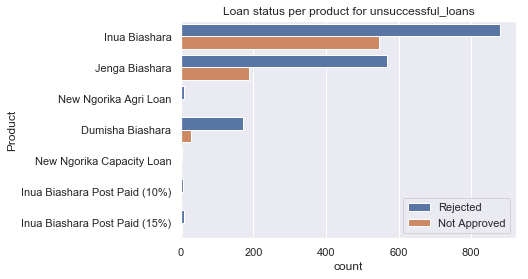

In [44]:
sns.countplot(y='Product', hue='Loan_Status', data=unsuccessful_loans)
plt.legend(loc='lower right')
plt.title('Loan status per product for unsuccessful_loans')
plt.show()

# EDA of Loans Schedules

In [45]:
loans_schedules.head(2)

,Loan ID,From Date,Due Date,Installment,Principal,Principal Completed,Interest,Interest Completed,Paid in Advance,Paid Late,Complete,Completed Date
0,2,2015-01-07,2015-01-14,1,1875.0,NaN,450.0,NaN,NaN,NaN,0,NaT
1,2,2015-01-14,2015-01-21,2,1875.0,NaN,450.0,NaN,NaN,NaN,0,NaT


In [46]:
# rename columns to python standards 
loans_schedules.columns = loans_schedules.columns.str.replace(' ', '_')
loans_schedules.columns

Index([u'Loan_ID', u'From_Date', u'Due_Date', u'Installment', u'Principal',
       u'Principal_Completed', u'Interest', u'Interest_Completed',
       u'Paid_in_Advance', u'Paid_Late', u'Complete', u'Completed_Date'],
      dtype='object')

In [47]:
# shape of the loans data 
print('loans schedules data has got {} rows and {} columns.'.format(loans_schedules.shape[0], loans_schedules.shape[1]))

loans schedules data has got 301004 rows and 12 columns.


In [48]:
#checking null data
loans_schedules.isnull().sum()

Loan_ID                     0
From_Date                   0
Due_Date                    0
Installment                 0
Principal                   0
Principal_Completed     48936
Interest               100444
Interest_Completed     140969
Paid_in_Advance        219154
Paid_Late              142870
Complete                    0
Completed_Date          62894
dtype: int64

In [49]:
# data types of loans schedules 
loans_schedules.dtypes

Loan_ID                         int64
From_Date              datetime64[ns]
Due_Date               datetime64[ns]
Installment                     int64
Principal                     float64
Principal_Completed           float64
Interest                      float64
Interest_Completed            float64
Paid_in_Advance               float64
Paid_Late                     float64
Complete                        int64
Completed_Date         datetime64[ns]
dtype: object

In [50]:
# summary statistics of loan schedules 
loans_schedules.drop('Loan_ID', 1).describe().T

,count,mean,std,min,25%,50%,75%,max
Installment,301004.0,4.506561,3.535509,1.00,2.0,4.0,6.000,36.00
Principal,301004.0,2870.295724,2201.749270,1001.38,1875.0,2500.0,3125.000,115789.87
Principal_Completed,252068.0,2742.353835,1675.583587,0.02,1875.0,2500.0,3125.000,99735.38
Interest,200560.0,742.348988,620.494271,11.17,450.0,600.0,875.010,35210.00
Interest_Completed,160035.0,711.282869,533.740473,0.01,450.0,600.0,875.000,35210.00
Paid_in_Advance,81850.0,1798.603824,2118.637074,0.01,150.0,1200.0,2500.065,49821.46
Paid_Late,158134.0,2988.543538,2296.396864,0.00,2325.0,2500.0,3725.000,118376.00
Complete,301004.0,0.791053,0.406557,0.00,1.0,1.0,1.000,1.00


In [51]:
# number of unique loan_id
loans_schedules.Loan_ID.nunique(), loans.Loan_ID.nunique()

(47368, 47342)

# EDA of loans Payments

In [52]:
# sample 
loans_payments.head(2)

,ID,Loan ID,TXN Date,Amount,Principal,Interest,Penalty
0,320,5,2015-01-22,2500.0,2500.0,NaN,NaN
1,321,5,2015-01-29,2500.0,2500.0,NaN,NaN


In [53]:
# shape of loans payments
print('loans payments has got {} rows and {} columns.'.format(loans_payments.shape[0], loans_payments.shape[1]))

loans payments has got 283924 rows and 7 columns.


In [54]:
# rename columns 
loans_payments.columns = loans_payments.columns.str.replace(' ', "_")
loans_payments.columns

Index([u'ID', u'Loan_ID', u'TXN_Date', u'Amount', u'Principal', u'Interest',
       u'Penalty'],
      dtype='object')

In [55]:
# check for null values
loans_payments.isnull().sum()

ID                0
Loan_ID           0
TXN_Date          0
Amount            0
Principal     18390
Interest     138513
Penalty      256131
dtype: int64

In [56]:
# check data types
loans_payments.dtypes

ID                    int64
Loan_ID               int64
TXN_Date     datetime64[ns]
Amount              float64
Principal           float64
Interest            float64
Penalty             float64
dtype: object

In [57]:
# summary statistics of loans payments
loans_payments.drop(['ID', 'Loan_ID'], 1).describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,283924.0,2965.148718,3377.558351,0.01,1400.0,2500.0,3542.17,351000.00
Principal,265534.0,2604.037236,2749.939584,0.01,1470.0,2400.0,3000.00,336669.81
Interest,145411.0,783.085901,858.005411,0.01,450.0,600.0,900.00,81000.00
Penalty,27793.0,1228.332654,1623.505067,0.01,200.0,600.0,1600.00,35500.00


In [58]:
loans_payments.groupby('Loan_ID')['Amount'].sum()

Loan_ID
5         11500.00
6         15000.00
7         20000.00
8         15300.00
9         15100.00
10        15000.00
11        10000.00
12        15000.00
13        15600.00
14        15100.00
15        10100.00
16        15000.00
17        15000.00
18        13700.00
19        10000.00
20        20000.00
21        20000.00
22        20600.00
23        10000.00
24        22700.00
25        10000.00
26        15000.00
27        15100.00
28        86521.75
29        64182.11
30       120426.10
31        68295.70
32       116009.00
33       129074.66
34        38509.29
           ...    
46483      2500.00
46488      2500.00
46489      4000.00
46495      2500.00
46507      2500.00
46562      2325.00
46576      1250.00
46578      2500.00
46589      2000.00
46608      1000.00
46621      2500.00
46647      2500.00
46655      2500.00
46657      1250.00
46679       300.00
46691      2500.00
46727      3100.00
46730      3000.00
46741      2500.00
46742      2500.00
46743      1300.00
4679

In [59]:
# transaction date details
loans_payments['TXN_Date'].describe()

count                  283924
unique                    885
top       2017-06-05 00:00:00
freq                     1337
first     2015-01-12 00:00:00
last      2017-06-14 00:00:00
Name: TXN_Date, dtype: object

## Loans payments date range from 2015-01-12 to 2017-06-14

In [60]:
#checking null data
loans_payments.isnull().sum()

ID                0
Loan_ID           0
TXN_Date          0
Amount            0
Principal     18390
Interest     138513
Penalty      256131
dtype: int64

In [61]:
#total loan repaid on that period
loans_payments['Amount'].sum()

841876884.7100003

In [62]:
import datetime as dt
loans_payments['year'] = loans_payments['TXN_Date'].dt.year
loans_payments['year'].value_counts()

2016    129698
2017     93762
2015     60464
Name: year, dtype: int64

In [63]:
# total amount paid per year 
pd.pivot_table(loans_payments, index=['year'], values=['Amount'], aggfunc=np.sum, margins=True)

,Amount
year,
2015,2.020296e+08
2016,3.784540e+08
2017,2.613933e+08
All,8.418769e+08


In [64]:
#conbine clients sheet and loans sheet with Client_ID column
comb_cl=pd.merge(clients[['Client_ID', 'Office']], loans, how='inner', on='Client_ID')
comb_cl.head()

,Client_ID,Office,Loan_ID,Product_ID,Product,Status_ID,Loan_Status,Principal,Interest,Repayments,...,Principal_Outstanding,Interest_Repaid,Interest_Outstanding,Loan_Outstanding,Penalties_Charged,Penalties_Paid,Penalties_Waived,Penalties_Outstanding,repeat_borrowing,check_dates
0,1,Ngong Rd,4,3,Inua Biashara,500,Rejected,0,0.0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,wrong
1,1,Ngong Rd,96,3,Inua Biashara,300,Active,15000,0.0,4,...,0.0,0.0,0.0,0.0,1600.0,700.0,0.0,900.0,2,right
2,2,Ngong Rd,1,3,Inua Biashara,500,Rejected,0,0.0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,wrong
3,2,Ngong Rd,101,3,Inua Biashara,600,Closed,10000,0.0,4,...,0.0,0.0,0.0,0.0,1200.0,1200.0,0.0,0.0,5,right
4,2,Ngong Rd,811,3,Inua Biashara,300,Active,10000,0.0,4,...,0.0,0.0,0.0,0.0,3800.0,2400.0,0.0,1400.0,5,right


In [65]:
# Loan Outstanding amounts per office
pd.pivot_table(comb_cl, index=['Office'], values=['Loan_Outstanding'], aggfunc=np.sum).sort_values('Loan_Outstanding', ascending=False)

,Loan_Outstanding
Office,
Ngorika,42159738.56
Ndonyo Njeru,29056546.31
Ngong Rd,4907026.66
Eldoret 2,4734012.18
Kahawa,4144449.63
Kiambu,3841758.18
Embakasi,3704654.03
Mombasa,3638820.10
Kitale,3616726.20


In [66]:
# Penalties Outstanding amounts per office
pd.pivot_table(comb_cl, index=['Office'], values=['Penalties_Outstanding'], aggfunc=np.sum).sort_values('Penalties_Outstanding', ascending=False)

,Penalties_Outstanding
Office,
Embakasi,18829218.44
Nakuru,13659095.09
Ngong Rd,13377231.18
Kariobangi,12903965.05
Rongai,10885368.02
Kitale,9662202.06
Naivasha,8106152.04
Kericho,7359244.01
Kiambu,7357390.78


# Repayment Analysis

In [67]:
# repayments
repayment_amount =loans_payments.groupby('Loan_ID')['Amount'].sum()
repayment_amount.head(3)

Loan_ID
5    11500.0
6    15000.0
7    20000.0
Name: Amount, dtype: float64

In [68]:
# merge repayment amount with loans 
loan_repayment = loans.merge(repayment_amount, on='Loan_ID')
loan_repayment.head(3)

,Loan_ID,Client_ID,Product_ID,Product,Status_ID,Loan_Status,Principal,Interest,Repayments,Date_Disbursed,...,Interest_Repaid,Interest_Outstanding,Loan_Outstanding,Penalties_Charged,Penalties_Paid,Penalties_Waived,Penalties_Outstanding,repeat_borrowing,check_dates,Amount
0,5,9,3,Inua Biashara,600,Closed,10000,0.0,4,2015-01-15,...,0.0,0.0,0.0,1500.0,1500.0,0.0,0.0,3,right,11500.0
1,6,10,3,Inua Biashara,600,Closed,15000,0.0,4,2015-01-16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,right,15000.0
2,7,11,3,Inua Biashara,600,Closed,20000,0.0,4,2015-01-16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,right,20000.0


In [69]:
# rename Amount column
loan_repayment = loan_repayment.rename(columns={'Amount': 'Repaid_Amount'})
loan_repayment.head(2)

,Loan_ID,Client_ID,Product_ID,Product,Status_ID,Loan_Status,Principal,Interest,Repayments,Date_Disbursed,...,Interest_Repaid,Interest_Outstanding,Loan_Outstanding,Penalties_Charged,Penalties_Paid,Penalties_Waived,Penalties_Outstanding,repeat_borrowing,check_dates,Repaid_Amount
0,5,9,3,Inua Biashara,600,Closed,10000,0.0,4,2015-01-15,...,0.0,0.0,0.0,1500.0,1500.0,0.0,0.0,3,right,11500.0
1,6,10,3,Inua Biashara,600,Closed,15000,0.0,4,2015-01-16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,right,15000.0


In [70]:
# calculate repayment rate per loan id
loan_repayment['repayment_rate'] = loan_repayment['Repaid_Amount']/loan_repayment['Principal']
loan_repayment.head(2)

,Loan_ID,Client_ID,Product_ID,Product,Status_ID,Loan_Status,Principal,Interest,Repayments,Date_Disbursed,...,Interest_Outstanding,Loan_Outstanding,Penalties_Charged,Penalties_Paid,Penalties_Waived,Penalties_Outstanding,repeat_borrowing,check_dates,Repaid_Amount,repayment_rate
0,5,9,3,Inua Biashara,600,Closed,10000,0.0,4,2015-01-15,...,0.0,0.0,1500.0,1500.0,0.0,0.0,3,right,11500.0,1.15
1,6,10,3,Inua Biashara,600,Closed,15000,0.0,4,2015-01-16,...,0.0,0.0,0.0,0.0,0.0,0.0,2,right,15000.0,1.00


In [71]:
# we cap repayments to a max of 1
loan_repayment['repayment_rate'] = np.where(loan_repayment['repayment_rate']>1,1,loan_repayment['repayment_rate'])

In [72]:
# summary stats of loan repayment rate
loan_repayment['repayment_rate'].describe()

count    43556.000000
mean         0.937259
std          0.189196
min          0.015000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: repayment_rate, dtype: float64

In [73]:
# overall repayment rate
repayment_rate = loan_repayment['repayment_rate'].mean()
print("Overal repayment rate is {}".format(repayment_rate))

Overal repayment rate is 0.937258962741


In [74]:
# repayment rate per product
pd.pivot_table(loan_repayment, index=['Product'], values=['repayment_rate'], aggfunc=np.mean, margins=True)

,repayment_rate
Product,
Dumisha Biashara,0.937306
Inua Biashara,0.959383
Inua Biashara Post Paid (10%),1.000000
Inua Biashara Post Paid (15%),1.000000
Jenga Biashara,0.933536
Ndonyo Njeru Agri Loan,0.325211
New Ngorika Agri Loan,0.467141
New Ngorika Capacity Loan,0.854154
All,0.937259


# Fancy graphs

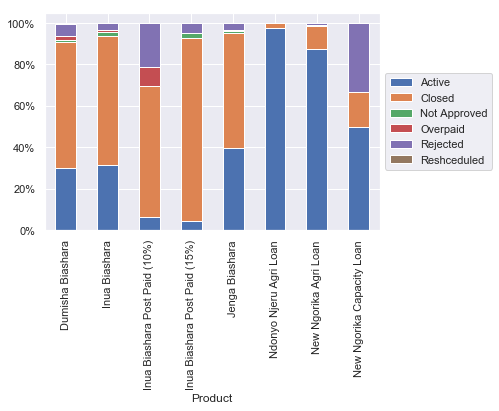

In [75]:
#Realtionship between products and loan status
import matplotlib.ticker as mtick
loans.groupby(['Product','Loan_Status']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

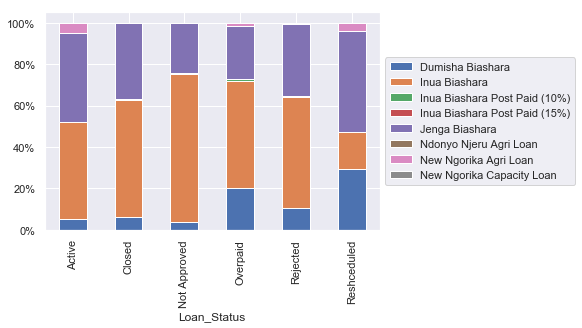

In [76]:
#Realtionship between products and loan status
loans.groupby(['Loan_Status','Product']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

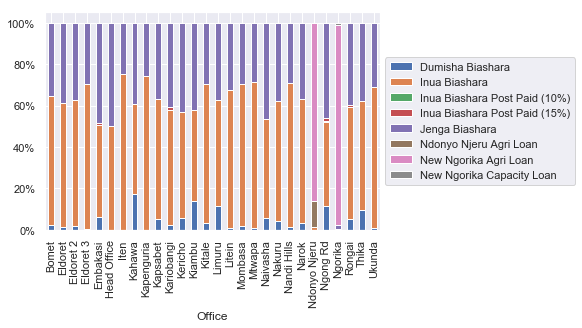

In [77]:
#In valid loans,relationship between offices and products
comb_cl.groupby(['Office','Product']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

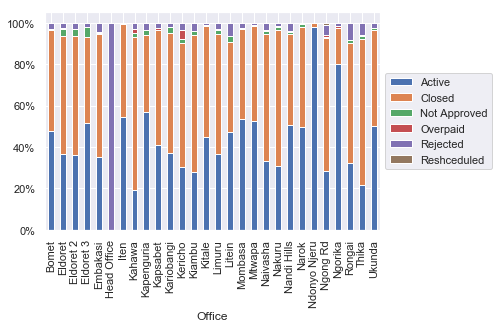

In [78]:
#Relationship between loan status and offices
comb_cl.groupby(['Office','Loan_Status']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()